<a href="https://colab.research.google.com/github/MazonSzymon/Project_COVID_portfolio/blob/main/project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  ***Analysis of investing at GPW in 2020*** 

---













#Downloading libraries and creating wig20 table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
%load_ext google.colab.data_table

In [2]:
#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')


In [3]:
#Creat a DataFrame with names of WIG 20 one joint stock company
stocks_at_WIG20 = pd.DataFrame(np.array([
    ['WIG20' , 'wig20.pl'],
    ['Alior Bank' , 'alr.pl'],
    ['CCC' , 'ccc.pl'],
    ['CD Projekt' , 'cdr.pl'],
    ['Cyfrowy Polsat SA' , 'cps.pl'],
    ['Dino Polska' , 'dnp.pl'],
    ['Jastrzebska Spolka Weglowa' , 'jsw.pl'],
    ['KGHM Polska Mied' , 'kgh.pl'],
    ['LPP' , 'lpp.pl'],
    ['Grupa Lotos SA' , 'lts.pl'],
    ['mBank' , 'mbk.pl'],
    ['Orange Polska' , 'opl.pl'],
    ['Bank Polka Kasa Opieki' , 'peo.pl'],
    ['PGE Polska Grupa Energetyczna' , 'pge.pl'],
    ['Polskie Gronictwo Naftowe i Gazownictwo' , 'pgn.pl'],
    ['Powszechna Kasa Oszczednosci Bank Polski' , 'pko.pl'],
    ['Play Communications SA' , 'ply.pl'],
    ['Powszechny Zaklad Ubezpieczen' , 'pzu.pl'],
    ['Santander Bank Polska' , 'spl.pl'],
    ['Tauron Polska Energia' , 'tpe.pl']
    ]), columns = ['Full_name','Short_name'])

# Functions

> ## Downloading data

In [4]:
def get_data(stock,start_date, end_date):
  stooq_data = pdr.get_data_stooq(stock['Short_name'], start = start_date, end = end_date).sort_index()
  stooq_data['Stock_name'] = stock['Full_name']
  df = stooq_data.copy()
  df.rename(columns = { stock['Short_name'] : 'stooq_data'},inplace = True)
  return df

>## WIG20 Tabel

In [5]:
def WIG20_frame(start_date,end_date):
  WIG20 = pd.DataFrame()
  for i in range(len(stocks_at_WIG20)):
    tmp = get_data(stocks_at_WIG20.iloc[i],start_date,end_date)
    WIG20 = WIG20.append(tmp)
  return WIG20

>## Portfolio

>> ### Creat investment

In [173]:
def creat_investment(stocks,investment):
  df = pd.DataFrame(columns=['Stock','Value'])
  df['Stock'] = stocks
  df['Value'] = investment
  df['Value'] = df['Value'].astype('float')
  df.sort_values('Stock', inplace = True)
  return df

>> ### Preparing portfolio



In [137]:
def preparing_portfolio(total_investments,stocks):
  
  #Get data to stock
  def get_frame(stock):
    return WIG20_by_stocks.get_group(stock)
  
  stocks_data = map(get_frame,stocks)
  df = pd.concat(stocks_data, keys = stocks, names= ['Stock','Date'])
  df = df.reset_index().pivot(index='Date',columns = 'Stock', values = ['Close','Volume'])
  portfolio_change = (1 + df[['Close']].pct_change()).cumprod().fillna(1).round(2).rename(columns = {'Close' : 'ROI'})
  integrer_of_stocks = (total_investments/df['Close'].iloc[0]).astype(int).values
  investment_by_stocks = integrer_of_stocks  * df['Close'].iloc[0]
  rest_investment = total_investments - investment_by_stocks.values
  rest_investment
  investment_value = portfolio_change.multiply(investment_by_stocks.values).rename(columns = {'ROI' : 'Investments_value'}).round(2)
  investment_value['Sum_of_investments'] = investment_value.sum(axis=1).round(2)
  portfolio_value = pd.concat([df,portfolio_change,investment_value], axis = 1)
  portfolio_value['ROI_of_investments'] = (1 + portfolio_value[['Sum_of_investments']].pct_change()).cumprod().fillna(1).round(2)
  print("-"*50)
  print("We first want to inveset {first_invest_value}  ".format( first_invest_value = total_investments.sum()))
  print("We get")
  for i in range(len(integrer_of_stocks)):
    print("{integrer} stocks {company}".format(integrer = integrer_of_stocks[i], company = portfolio_value[['Investments_value'][0]].columns[i]))
  print("and the rest from investment {rest}".format(rest = rest_investment.sum().round(2)))
  return portfolio_value

>> ### portfolio_summary

In [25]:
def portfolio_summary(portfolio):
  #Stocks list
  tmp = portfolio.columns.to_frame()['Stock'].values
  portfolio_list = ''
  for i in range(int(len(tmp)/4)):
    portfolio_list = portfolio_list + tmp[i]
    if i < len(tmp)/4 -2:
      portfolio_list = portfolio_list + ", "

  #Summary
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stocks}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Sum_of_investments'][0], stocks = portfolio_list
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Sum_of_investments'][-1]
  ))
  print("-"*50)
  print("Rate of investment is {ROI} %".format(
      ROI = ((portfolio['Sum_of_investments'][-1]/portfolio['Sum_of_investments'][0] -1)*100).round(2)
  ))
  print("-"*50 + "\n")
  #Graphs
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  for i in range(int(len(tmp)/4)):
    plt.plot(portfolio[['Investments_value'][0]][portfolio[['Investments_value'][0]].columns[i]], label = portfolio[['Investments_value'][0]].columns[i])
  plt.grid()
  plt.legend()
  plt.title('Value of investments by stocks')
  #2
  plt.subplot(122)
  plt.plot(portfolio['Sum_of_investments'])
  plt.title('Value of investment')
  plt.grid()
  plt.show()

  return

>> ### Portfolio compare

In [26]:
def portfolio_compare(portfolio, benchmark):
  #Stocks list
  tmp = portfolio.columns.to_frame()['Stock'].values
  portfolio_list = ''
  for i in range(int(len(tmp)/4)):
    portfolio_list = portfolio_list + tmp[i]
    if i < len(tmp)/4 -2:
      portfolio_list = portfolio_list + ", "
  
  tmp = benchmark.columns.to_frame()['Stock'].values
  benchmark_list = ''
  for i in range(int(len(tmp)/4)):
    benchmark_list = benchmark_list + tmp[i]
    if i < len(tmp)/5 -2:
      benchmark_list = benchmark_list + ", "
  

  #compare
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stocks}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Sum_of_investments'][0], stocks = portfolio_list
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN, Rate of investment is {ROI} %".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Sum_of_investments'][-1],
      ROI = ((portfolio['Sum_of_investments'][-1]/portfolio['Sum_of_investments'][0] -1)*100).round(2)
  ))
  
     
  print("Ratio investment to benchmark is {change}%".format(
     change = ((portfolio['Sum_of_investments'][-1]/benchmark['Sum_of_investments'][-1] - 1)*100).round(2)))
  print("-"*50+ "\n")
  #graphs
  plt.figure(figsize=(15,10))
  plt.plot(portfolio['Sum_of_investments'], color = 'green', label = portfolio_list)
  plt.plot(benchmark['Sum_of_investments'], color = 'red',label = benchmark_list)
  plt.title("Value of investment " + portfolio_list, fontsize = 22, fontweight="bold")
  plt.grid()
  plt.legend()

  return

>## Change interval

In [49]:
def change_interval(portfolio):
  print("-"*50)
  print("Week's mean" + "\n")
  print(portfolio.resample('W').mean().tail())
  
  print("-"*50+"\n")
  print("Month's last value" + "\n")
  print(portfolio.resample('M').last().tail())
  print("-"*50)
  return 

>## Visualization of stock actions

In [51]:
def make_graphics(portfolio):
  tmp = portfolio.columns.to_frame()['Stock'].values
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  for i in range(int(len(tmp)/4)):
    plt.plot(portfolio[['Close'][0]][portfolio[['Close'][0]].columns[i]], label = portfolio[['Close'][0]].columns[i])
  plt.grid()
  plt.legend()
  plt.title('Value of  by stocks')
  #2
  plt.subplot(122)
  plt.plot(portfolio['Sum_of_investments'])
  plt.title('Value of investment')
  plt.grid()
  return plt.show()

>## Relative change

In [314]:
def relative_change(portfolio):
  tmp = portfolio.columns.to_frame()['Stock'].values

  # Graphs
  for i in range(int(len(tmp)/4)):
    if (i) > len(tmp)/2-1:
      break
    else:
      #1
      plt.figure(figsize=(28,8))
      for k in range(0,2):
        if (k+i*2) > int(len(tmp)/4)-1:
          break
        else:
          plt.plot(np.log(portfolio['Close'].pct_change()+1)[portfolio[['Close'][0]].columns[i*2 + k]], label = portfolio[['Close'][0]].columns[i*2+k])
          plt.grid()
          plt.legend()
          plt.title('ROI')
      plt.show()
      #2 
      plt.figure(figsize=(28,8))
      for k in range(0,2):
        if (k+i*2) > int(len(tmp)/4)-1:
          break
        else:
          plt.subplot(121 + k)
          plt.hist(np.log(portfolio['Close'].pct_change()+1)[portfolio[['Close'][0]].columns[i*2 + k]], label = portfolio[['Close'][0]].columns[i*2+k])
          plt.grid()
          plt.legend()
          plt.title('ROI')
      plt.show()


  return plt.show()

# WIG20

In [13]:
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
# WIG20_tabel = WIG20_frame(start_date,end_date) #Run onc time because its API

In [14]:
WIG20_tabel

,Open,High,Low,Close,Volume,Stock_name
Date,,,,,,
2020-01-02,2161.550,2200.570,2161.420,2200.100,21369888,WIG20
2020-01-03,2192.310,2192.310,2159.030,2173.970,20627251,WIG20
2020-01-07,2171.720,2176.800,2143.110,2145.010,19556434,WIG20
2020-01-08,2140.290,2140.290,2114.240,2115.990,20739943,WIG20
2020-01-09,2132.020,2157.610,2132.020,2157.610,19887696,WIG20
...,...,...,...,...,...,...
2020-10-12,2.096,2.126,2.040,2.062,3668557,Tauron Polska Energia
2020-10-13,2.086,2.092,1.965,1.965,3351472,Tauron Polska Energia
2020-10-14,1.973,2.092,1.971,2.048,6105461,Tauron Polska Energia


In [15]:
WIG20_by_stocks = WIG20_tabel.groupby('Stock_name') #This is our basic tabel to creating portfolios !!!!!!!!!!!!!!!!!

# Portfolio

In [227]:
WIG20_by_stocks.size().to_frame().index

Index(['Alior Bank', 'Bank Polka Kasa Opieki', 'CCC', 'CD Projekt',
       'Cyfrowy Polsat SA', 'Dino Polska', 'Grupa Lotos SA',
       'Jastrzebska Spolka Weglowa', 'KGHM Polska Mied', 'LPP',
       'Orange Polska', 'PGE Polska Grupa Energetyczna',
       'Play Communications SA', 'Polskie Gronictwo Naftowe i Gazownictwo',
       'Powszechna Kasa Oszczednosci Bank Polski',
       'Powszechny Zaklad Ubezpieczen', 'Santander Bank Polska',
       'Tauron Polska Energia', 'WIG20', 'mBank'],
      dtype='object', name='Stock_name')

In [177]:
#Our Investment
stocks = ['Alior Bank','LPP','CD Projekt','mBank']
values_investment = [1000,2500,1000,5000]
investment = creat_investment(stocks,values_investment)

#Benchmark
benchmark = ['WIG20']
sum_investment = investment['Value'].sum() # If Benchmark have more than one company change like up


benchmark_portfolio = preparing_portfolio(sum_investment, benchmark)

my_portfolio = preparing_portfolio(investment['Value'].values,investment['Stock'])

--------------------------------------------------
We first want to inveset 9500.0  
We get
4 stocks WIG20
and the rest from investment 699.6
--------------------------------------------------
We first want to inveset 9500.0  
We get
33 stocks Alior Bank
3 stocks CD Projekt
0 stocks LPP
12 stocks mBank
and the rest from investment 2920.1


--------------------------------------------------
At 2020-01-02 We invested 6579.9 PLN at Alior Bank, CD Projekt, LPP, mBank
--------------------------------------------------
On 2020-10-16 is worth 3358.47 PLN
--------------------------------------------------
Rate of investment is -48.96 %
--------------------------------------------------



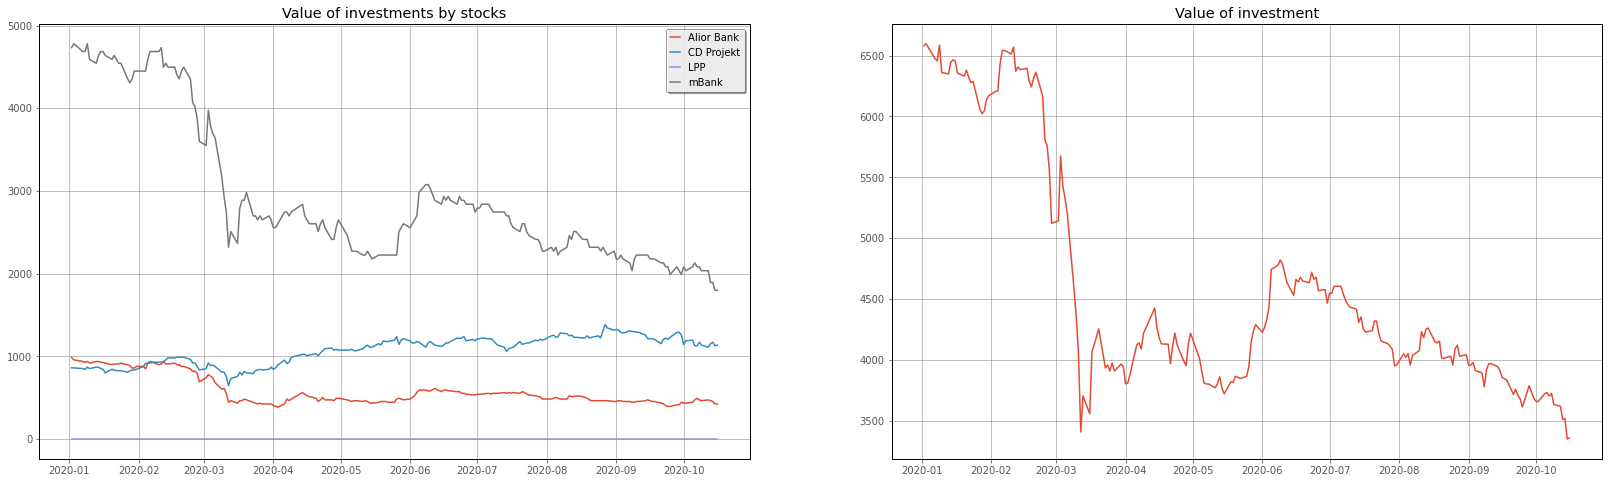

In [178]:
portfolio_summary(my_portfolio)

--------------------------------------------------
At 2020-01-02 We invested 6579.9 PLN at Alior Bank, CD Projekt, LPP, mBank
--------------------------------------------------
On 2020-10-16 is worth 3358.47 PLN, Rate of investment is -48.96 %
Ratio investment to benchmark is -48.43%
--------------------------------------------------



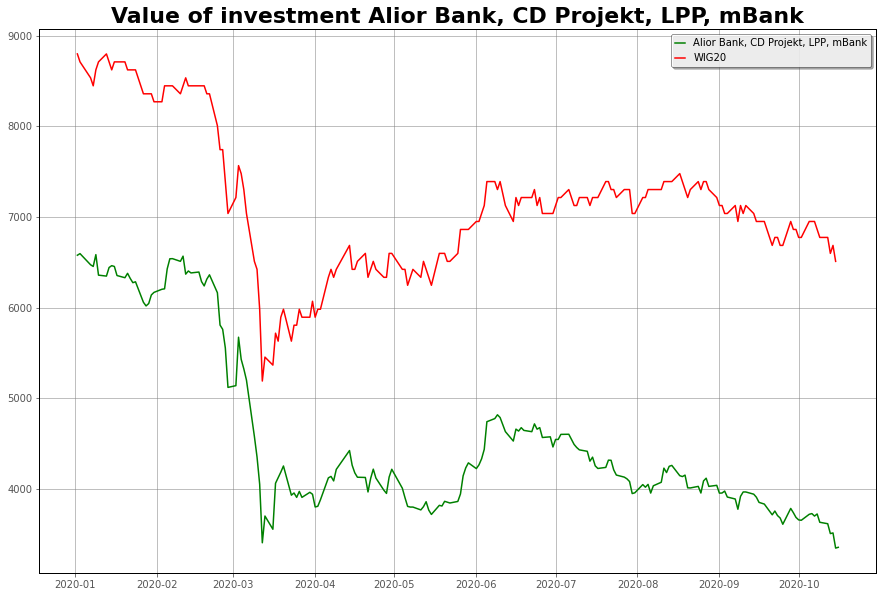

In [180]:
portfolio_compare(my_portfolio,benchmark_portfolio)

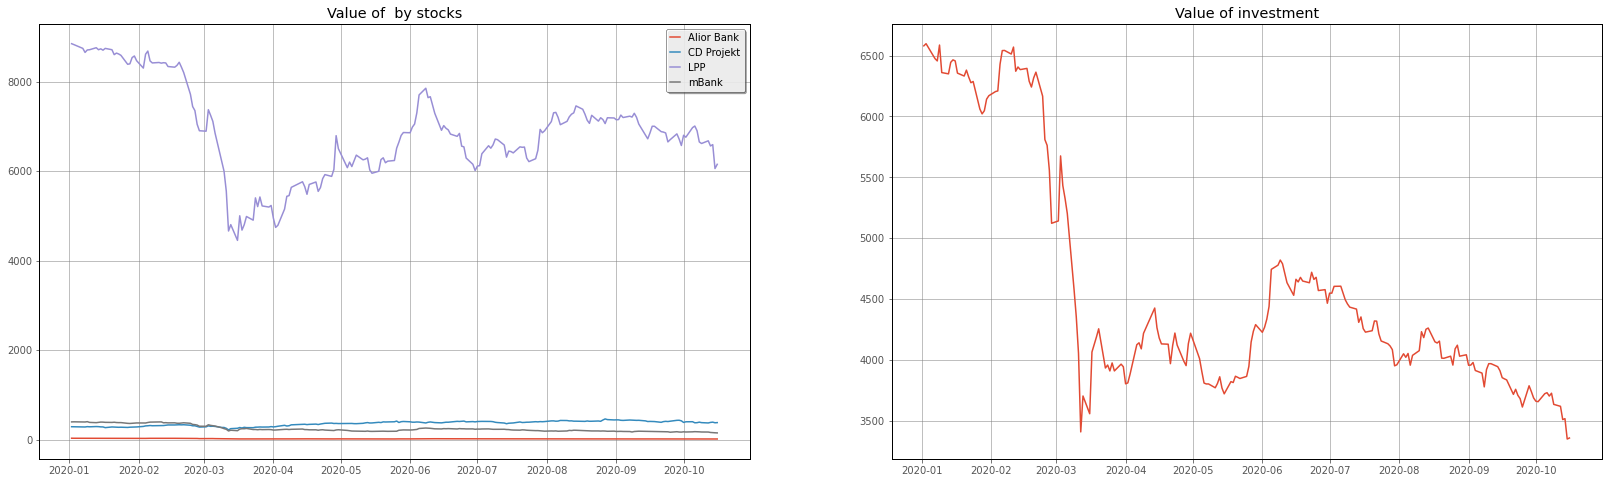

In [280]:
make_graphics(my_portfolio)

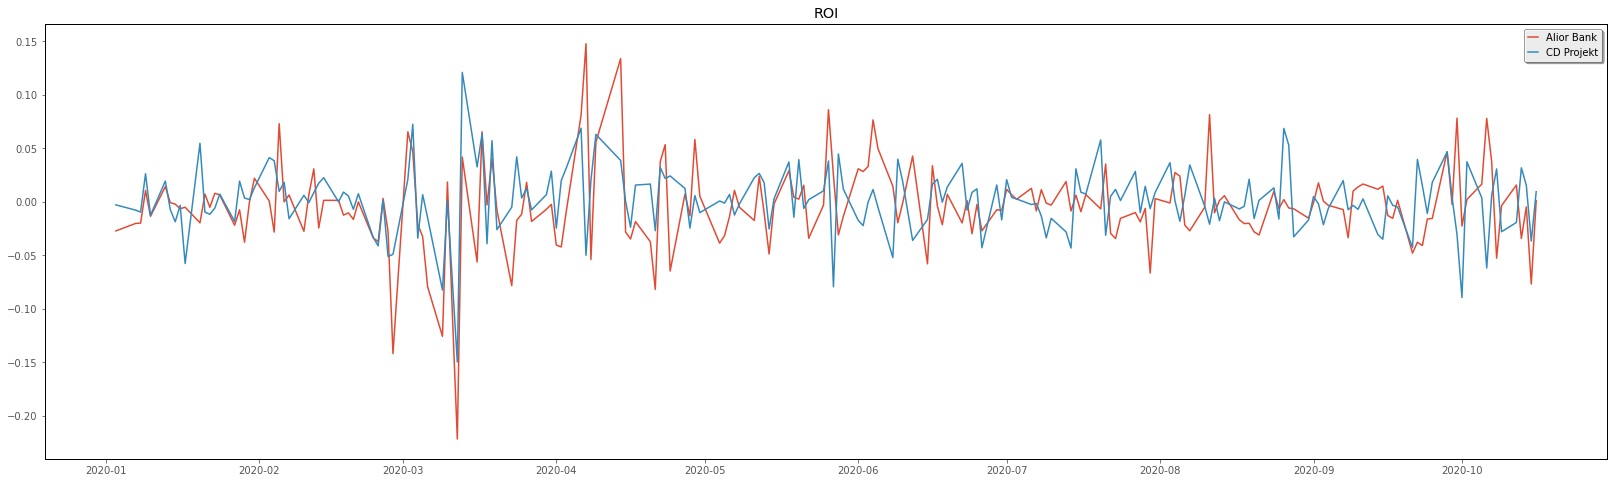

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


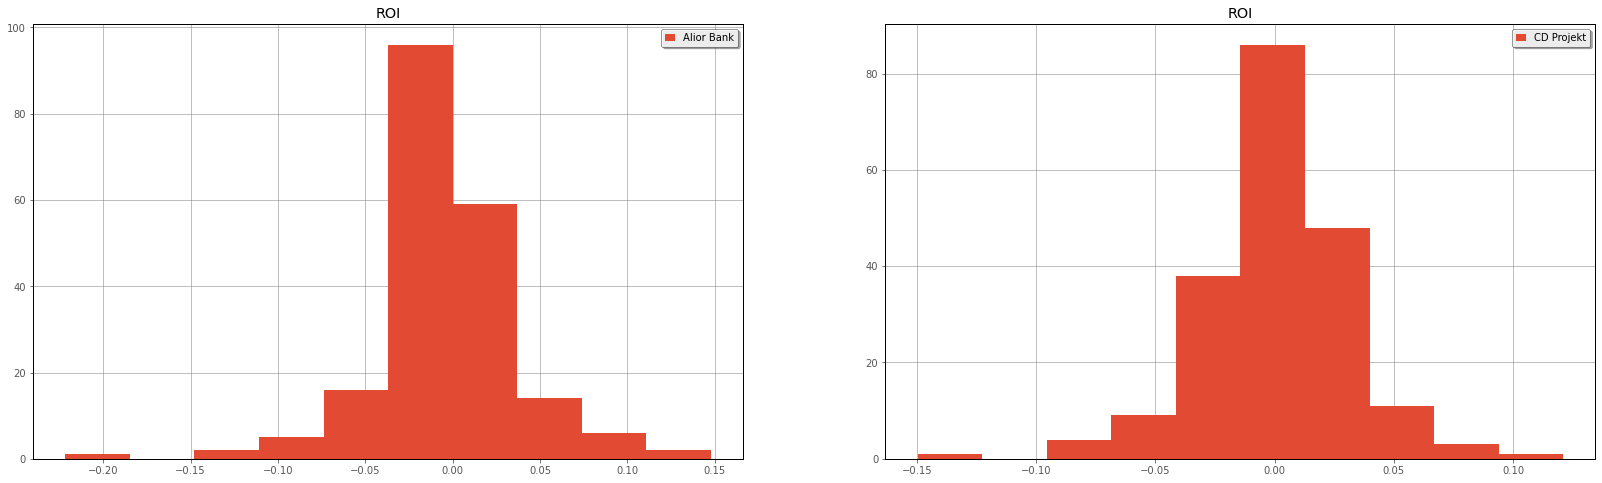

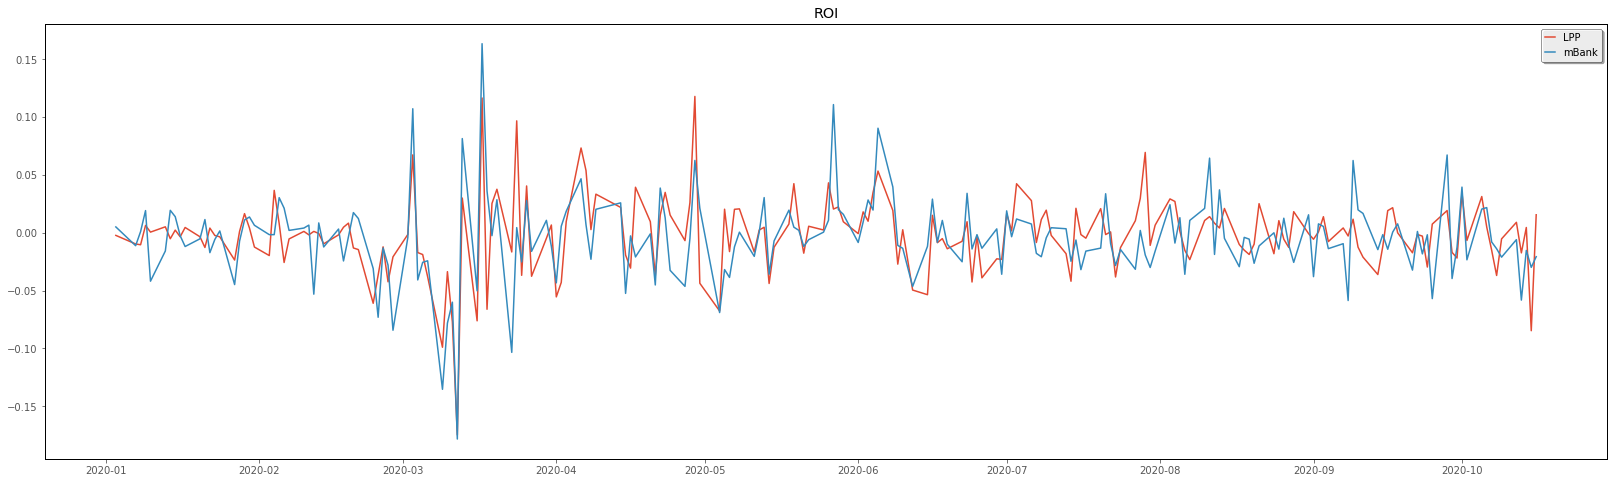

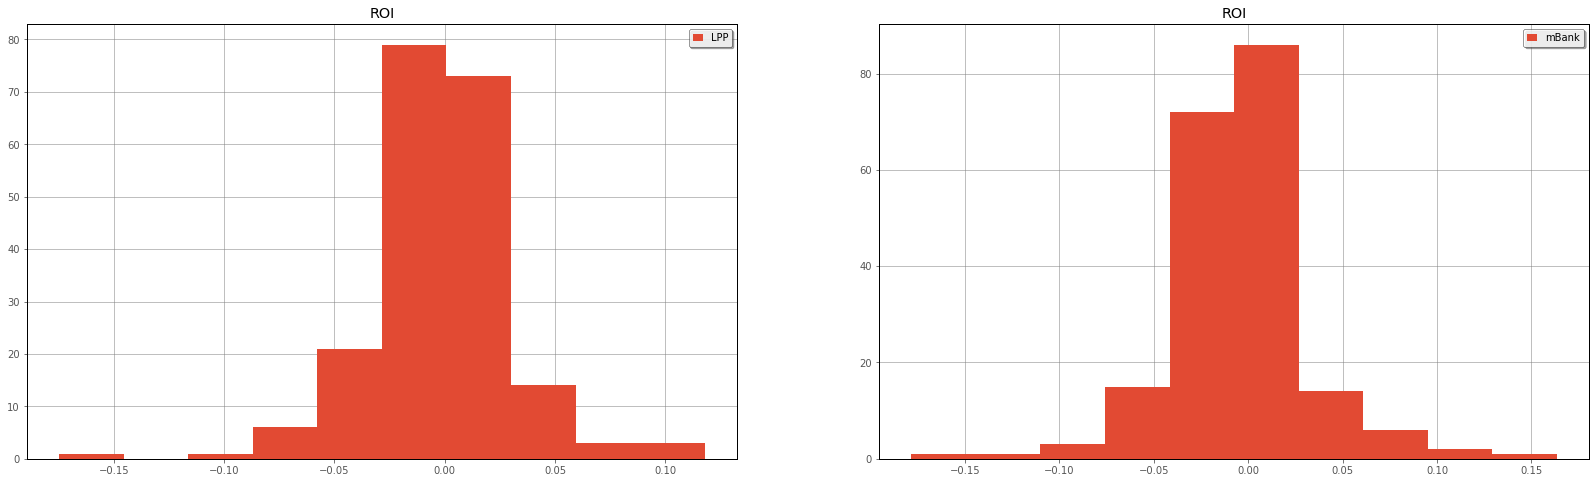

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

In [313]:
relative_change(my_portfolio)